<a href="https://colab.research.google.com/github/KGuruPrasad94/DS_challenge_C1/blob/main/DS_challenge.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Capital One - Data Science Challenge**

# **1.Import and Setup**

In [1]:
# Import all necessary packages

import numpy as np

import pandas as pd

import matplotlib.pyplot as plt

import seaborn as sns

import sklearn as skl

import statsmodels.api as sm

import panel as pn

import plotly.graph_objects as go

import scipy as sp

import os

import random

import requests

import zipfile

import io

from datetime import timedelta

In [2]:
# ignore warnings

import warnings

warnings.filterwarnings("ignore")

In [3]:
# setting display settings to view full df

pd.set_option('display.max_columns', None)

# **2. Data Load and Exploration**

In [4]:
# load data from github

url = "https://github.com/CapitalOneRecruiting/DS/raw/refs/heads/master/transactions.zip"



response = requests.get(url)

response.raise_for_status()

In [5]:
# unzip file and read with pandas

with zipfile.ZipFile(io.BytesIO(response.content)) as myzip:

    myzip.extractall()



    with myzip.open("transactions.txt") as file:

        df = pd.read_json(file, lines=True)

In [6]:
df.head()

,accountNumber,customerId,creditLimit,availableMoney,transactionDateTime,transactionAmount,merchantName,acqCountry,merchantCountryCode,posEntryMode,posConditionCode,merchantCategoryCode,currentExpDate,accountOpenDate,dateOfLastAddressChange,cardCVV,enteredCVV,cardLast4Digits,transactionType,echoBuffer,currentBalance,merchantCity,merchantState,merchantZip,cardPresent,posOnPremises,recurringAuthInd,expirationDateKeyInMatch,isFraud
0,737265056,737265056,5000,5000.0,2016-08-13T14:27:32,98.55,Uber,US,US,02,01,rideshare,06/2023,2015-03-14,2015-03-14,414,414,1803,PURCHASE,,0.0,,,,False,,,False,False
1,737265056,737265056,5000,5000.0,2016-10-11T05:05:54,74.51,AMC #191138,US,US,09,01,entertainment,02/2024,2015-03-14,2015-03-14,486,486,767,PURCHASE,,0.0,,,,True,,,False,False
2,737265056,737265056,5000,5000.0,2016-11-08T09:18:39,7.47,Play Store,US,US,09,01,mobileapps,08/2025,2015-03-14,2015-03-14,486,486,767,PURCHASE,,0.0,,,,False,,,False,False
3,737265056,737265056,5000,5000.0,2016-12-10T02:14:50,7.47,Play Store,US,US,09,01,mobileapps,08/2025,2015-03-14,2015-03-14,486,486,767,PURCHASE,,0.0,,,,False,,,False,False
4,830329091,830329091,5000,5000.0,2016-03-24T21:04:46,71.18,Tim Hortons #947751,US,US,02,01,fastfood,10/2029,2015-08-06,2015-08-06,885,885,3143,PURCHASE,,0.0,,,,True,,,False,False


In [7]:
# inspecting shape of df

print("Dataset Dimensions: {} x {}".format(df.shape[0], df.shape[1]))

Dataset Dimensions: 786363 x 29


In [8]:
# replacing white space with nan

df = df.replace(r'^\s*$', np.nan, regex=True)

In [9]:
# view dataframe info

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 786363 entries, 0 to 786362
Data columns (total 29 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   accountNumber             786363 non-null  int64  
 1   customerId                786363 non-null  int64  
 2   creditLimit               786363 non-null  int64  
 3   availableMoney            786363 non-null  float64
 4   transactionDateTime       786363 non-null  object 
 5   transactionAmount         786363 non-null  float64
 6   merchantName              786363 non-null  object 
 7   acqCountry                781801 non-null  object 
 8   merchantCountryCode       785639 non-null  object 
 9   posEntryMode              782309 non-null  object 
 10  posConditionCode          785954 non-null  object 
 11  merchantCategoryCode      786363 non-null  object 
 12  currentExpDate            786363 non-null  object 
 13  accountOpenDate           786363 non-null  o

In [10]:
# generate descriptive statistics

df.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
accountNumber,786363.0,NaN,NaN,NaN,537232599.461703,255421092.307309,100088067.0,330133277.0,507456073.0,767620004.0,999389635.0
customerId,786363.0,NaN,NaN,NaN,537232599.461703,255421092.307309,100088067.0,330133277.0,507456073.0,767620004.0,999389635.0
creditLimit,786363.0,NaN,NaN,NaN,10759.464459,11636.17489,250.0,5000.0,7500.0,15000.0,50000.0
availableMoney,786363.0,NaN,NaN,NaN,6250.725369,8880.783989,-1005.63,1077.42,3184.86,7500.0,50000.0
transactionDateTime,786363,776637,2016-12-25T14:04:15,4,NaN,NaN,NaN,NaN,NaN,NaN,NaN
transactionAmount,786363.0,NaN,NaN,NaN,136.985791,147.725569,0.0,33.65,87.9,191.48,2011.54
merchantName,786363,2490,Uber,25613,NaN,NaN,NaN,NaN,NaN,NaN,NaN
acqCountry,781801,4,US,774709,NaN,NaN,NaN,NaN,NaN,NaN,NaN
merchantCountryCode,785639,4,US,778511,NaN,NaN,NaN,NaN,NaN,NaN,NaN
posEntryMode,782309,5,05,315035,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [11]:
# null values in each column

df.isnull().sum()

accountNumber                    0
customerId                       0
creditLimit                      0
availableMoney                   0
transactionDateTime              0
transactionAmount                0
merchantName                     0
acqCountry                    4562
merchantCountryCode            724
posEntryMode                  4054
posConditionCode               409
merchantCategoryCode             0
currentExpDate                   0
accountOpenDate                  0
dateOfLastAddressChange          0
cardCVV                          0
enteredCVV                       0
cardLast4Digits                  0
transactionType                698
echoBuffer                  786363
currentBalance                   0
merchantCity                786363
merchantState               786363
merchantZip                 786363
cardPresent                      0
posOnPremises               786363
recurringAuthInd            786363
expirationDateKeyInMatch         0
isFraud             

In [12]:
#checking unique accounts

df.accountNumber.nunique()

5000

In [13]:
#checking unique customers

df.customerId.nunique()

5000

In [14]:
# checking if all account number = customer id

df['accountNumber'].equals(df['customerId'])

True

In [15]:
#checking for duplicate values

df.duplicated().sum()

0

**Intial observations**







1.   6 columns in the datasets doesn't contain any values and there are 5 additional columns with at least 1 null value.

2.   Account number and Customer Id column have 1:1 mapping (ie- they are same) and seems to be redundant.

3. No duplicated rows present in data




# **3. Exploratory Data Analysis (EDA) and Data Inspection**

**3.1 Inspecting the distribution of currency columns**

array([[<Axes: title={'center': 'creditLimit'}>,
        <Axes: title={'center': 'availableMoney'}>],
       [<Axes: title={'center': 'transactionAmount'}>,
        <Axes: title={'center': 'currentBalance'}>]], dtype=object)

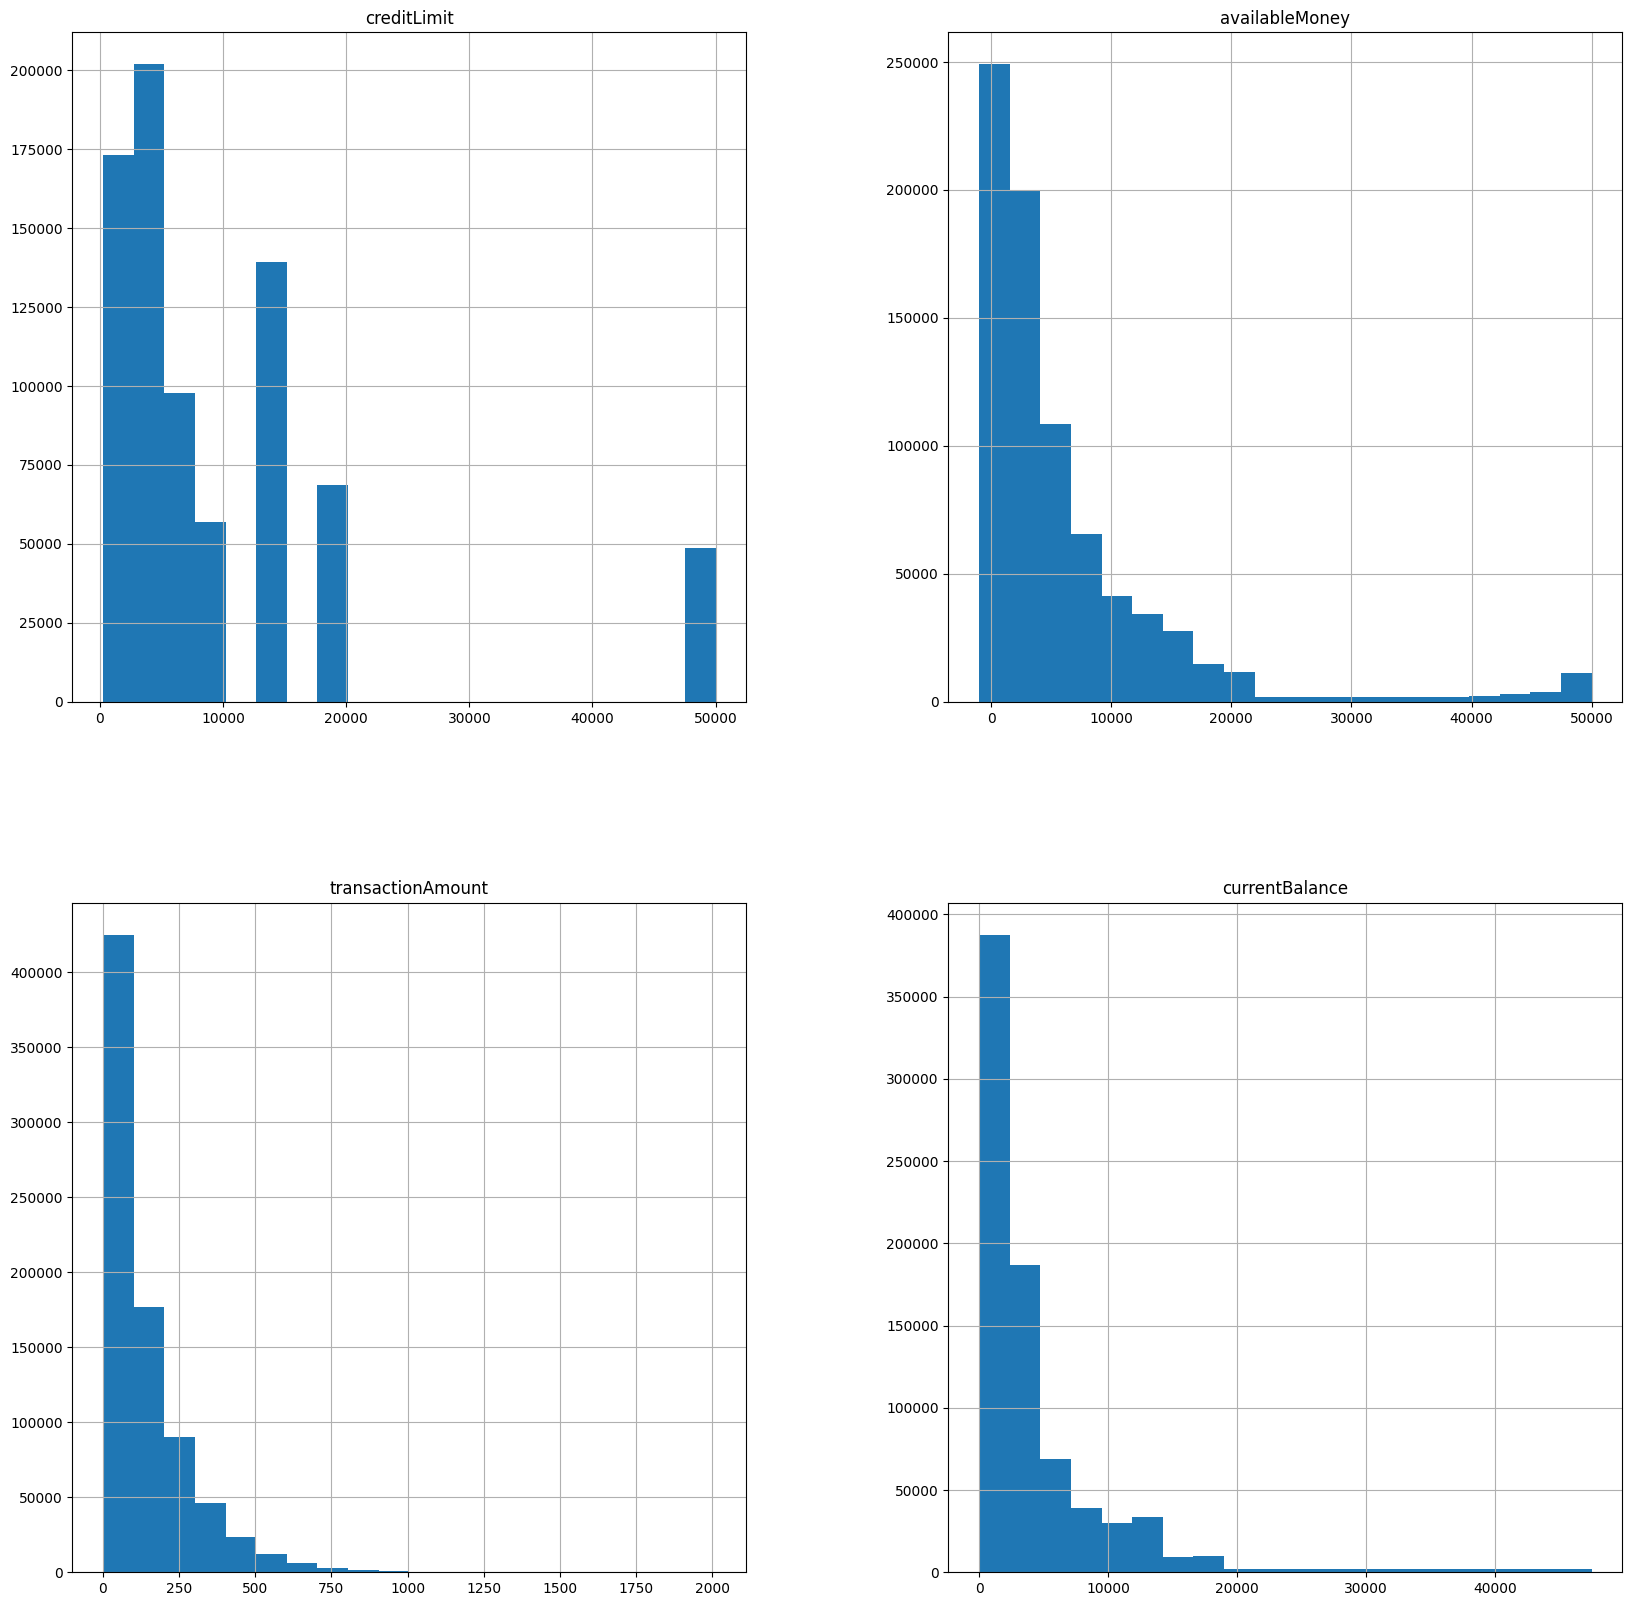

In [16]:
# checking the distribution of currency columns

df[['creditLimit','availableMoney','transactionAmount','currentBalance']].hist(bins = 20 , figsize= (20,20))

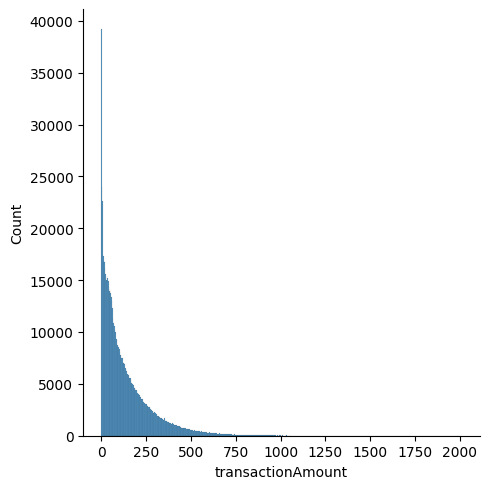

In [17]:
# checking the distribution of "transactionAmount"

sns.displot(df['transactionAmount'])

plt.show()



Observations:

1.   Histogram shows a right skewed distribution which is expected in credit card transaction data.

2.   Most transaction amounts are small and are clustered near zero and also has a large tail.




In [18]:
df.head()

,accountNumber,customerId,creditLimit,availableMoney,transactionDateTime,transactionAmount,merchantName,acqCountry,merchantCountryCode,posEntryMode,posConditionCode,merchantCategoryCode,currentExpDate,accountOpenDate,dateOfLastAddressChange,cardCVV,enteredCVV,cardLast4Digits,transactionType,echoBuffer,currentBalance,merchantCity,merchantState,merchantZip,cardPresent,posOnPremises,recurringAuthInd,expirationDateKeyInMatch,isFraud
0,737265056,737265056,5000,5000.0,2016-08-13T14:27:32,98.55,Uber,US,US,02,01,rideshare,06/2023,2015-03-14,2015-03-14,414,414,1803,PURCHASE,NaN,0.0,NaN,NaN,NaN,False,NaN,NaN,False,False
1,737265056,737265056,5000,5000.0,2016-10-11T05:05:54,74.51,AMC #191138,US,US,09,01,entertainment,02/2024,2015-03-14,2015-03-14,486,486,767,PURCHASE,NaN,0.0,NaN,NaN,NaN,True,NaN,NaN,False,False
2,737265056,737265056,5000,5000.0,2016-11-08T09:18:39,7.47,Play Store,US,US,09,01,mobileapps,08/2025,2015-03-14,2015-03-14,486,486,767,PURCHASE,NaN,0.0,NaN,NaN,NaN,False,NaN,NaN,False,False
3,737265056,737265056,5000,5000.0,2016-12-10T02:14:50,7.47,Play Store,US,US,09,01,mobileapps,08/2025,2015-03-14,2015-03-14,486,486,767,PURCHASE,NaN,0.0,NaN,NaN,NaN,False,NaN,NaN,False,False
4,830329091,830329091,5000,5000.0,2016-03-24T21:04:46,71.18,Tim Hortons #947751,US,US,02,01,fastfood,10/2029,2015-08-06,2015-08-06,885,885,3143,PURCHASE,NaN,0.0,NaN,NaN,NaN,True,NaN,NaN,False,False


In [19]:
df.columns

Index(['accountNumber', 'customerId', 'creditLimit', 'availableMoney',
       'transactionDateTime', 'transactionAmount', 'merchantName',
       'acqCountry', 'merchantCountryCode', 'posEntryMode', 'posConditionCode',
       'merchantCategoryCode', 'currentExpDate', 'accountOpenDate',
       'dateOfLastAddressChange', 'cardCVV', 'enteredCVV', 'cardLast4Digits',
       'transactionType', 'echoBuffer', 'currentBalance', 'merchantCity',
       'merchantState', 'merchantZip', 'cardPresent', 'posOnPremises',
       'recurringAuthInd', 'expirationDateKeyInMatch', 'isFraud'],
      dtype='object')

**3.2 Inspecting Location based columns**

In [20]:
#inspecting "acqCountry"

df['acqCountry'].value_counts()

acqCountry
US     774709
MEX      3130
CAN      2424
PR       1538
Name: count, dtype: int64

In [21]:
#inspecting "merchantCountryCode"

df['merchantCountryCode'].value_counts()

merchantCountryCode
US     778511
MEX      3143
CAN      2426
PR       1559
Name: count, dtype: int64

In [22]:
# checking the count of equal values in "acqCountry" and "merchantCountryCode" column

equal_count = (df['acqCountry'] == df['merchantCountryCode']).sum()

equal_count

781731

In [23]:
# checking the count of unequal values in "acqCountry" and "merchantCountryCode" column

unequal_count = (df['acqCountry'] != df['merchantCountryCode']).sum()

unequal_count

4632

In [24]:
# calculating fraud rate for each "merchantCountryCode"



country_fraud_summary = df.groupby('merchantCountryCode').agg(

    total_transactions=('isFraud', 'count'),

    total_fraud=('isFraud', 'sum')

)



country_fraud_summary['fraud_rate'] = (country_fraud_summary['total_fraud'] / country_fraud_summary['total_transactions'])*100

country_fraud_summary

,total_transactions,total_fraud,fraud_rate
merchantCountryCode,,,
CAN,2426,56,2.308326
MEX,3143,64,2.036271
PR,1559,27,1.731879
US,778511,12188,1.565553


**Observations:**

**3.3 Inspecting Merchant Category**

In [25]:
# unique merchantCategoryCode

df['merchantCategoryCode'].nunique()

19

In [26]:
# calculating fraud rate and total transaction volume for each "merchantCategoryCode"

mc_fraud_summary = df.groupby('merchantCategoryCode').agg(

    total_transactions=('isFraud', 'count'),

    total_fraud=('isFraud', 'sum')

)



mc_fraud_summary['fraud_rate'] = (mc_fraud_summary['total_fraud'] / mc_fraud_summary['total_transactions'])*100

mc_fraud_summary = mc_fraud_summary.reset_index()

mc_fraud_summary = mc_fraud_summary.sort_values(by='total_transactions', ascending=False)

mc_fraud_summary = pd.DataFrame(mc_fraud_summary)

mc_fraud_summary

,merchantCategoryCode,total_transactions,total_fraud,fraud_rate
14,online_retail,202156,4938,2.442668
4,fastfood,112138,1074,0.957748
3,entertainment,80098,961,1.199780
5,food,75490,1014,1.343224
13,online_gifts,66238,1606,2.424590
17,rideshare,51136,1272,2.487484
11,hotels,34097,250,0.733202
7,fuel,23910,0,0.000000
18,subscriptions,22901,216,0.943190
1,auto,21651,273,1.260912


Text(0, 0.5, 'MerchantCategory')

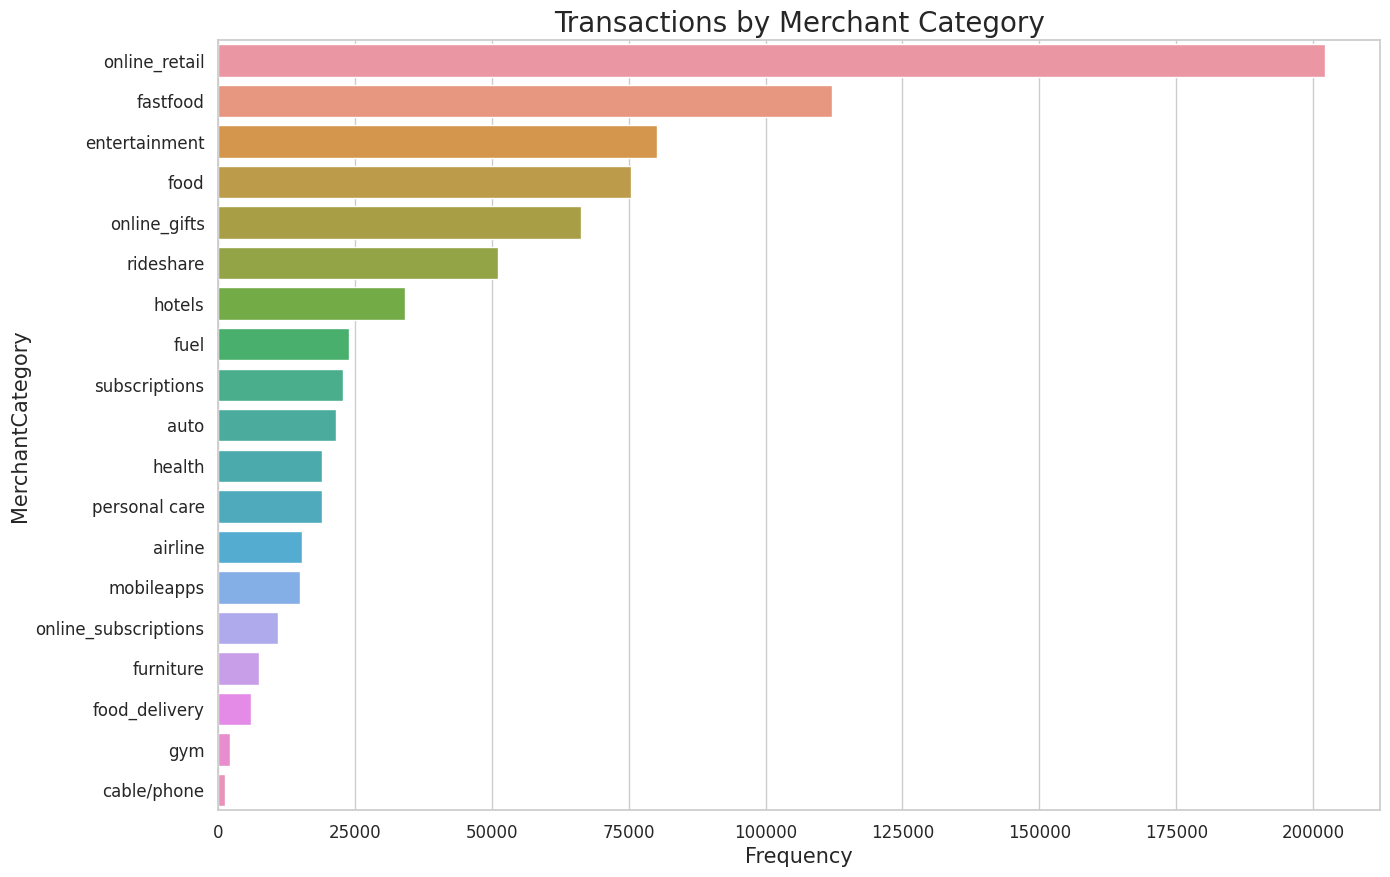

In [27]:
# bar plot: transaction volume by Merchant Category



sns.set_theme(style="whitegrid")



# Initialize the matplotlib figure

f, ax = plt.subplots(figsize=(15, 10))



# plotting a bar plot

bar1 = sns.barplot(y="merchantCategoryCode", x="total_transactions", data=mc_fraud_summary, label="Transactions count")



# formatting tick size

plt.xticks(fontsize=12)

plt.yticks(fontsize=12)



# setting title and label

plt.title("Transactions by Merchant Category", loc='center',fontsize=20)

plt.xlabel('Frequency',fontsize=15)

plt.ylabel('MerchantCategory',fontsize=15)

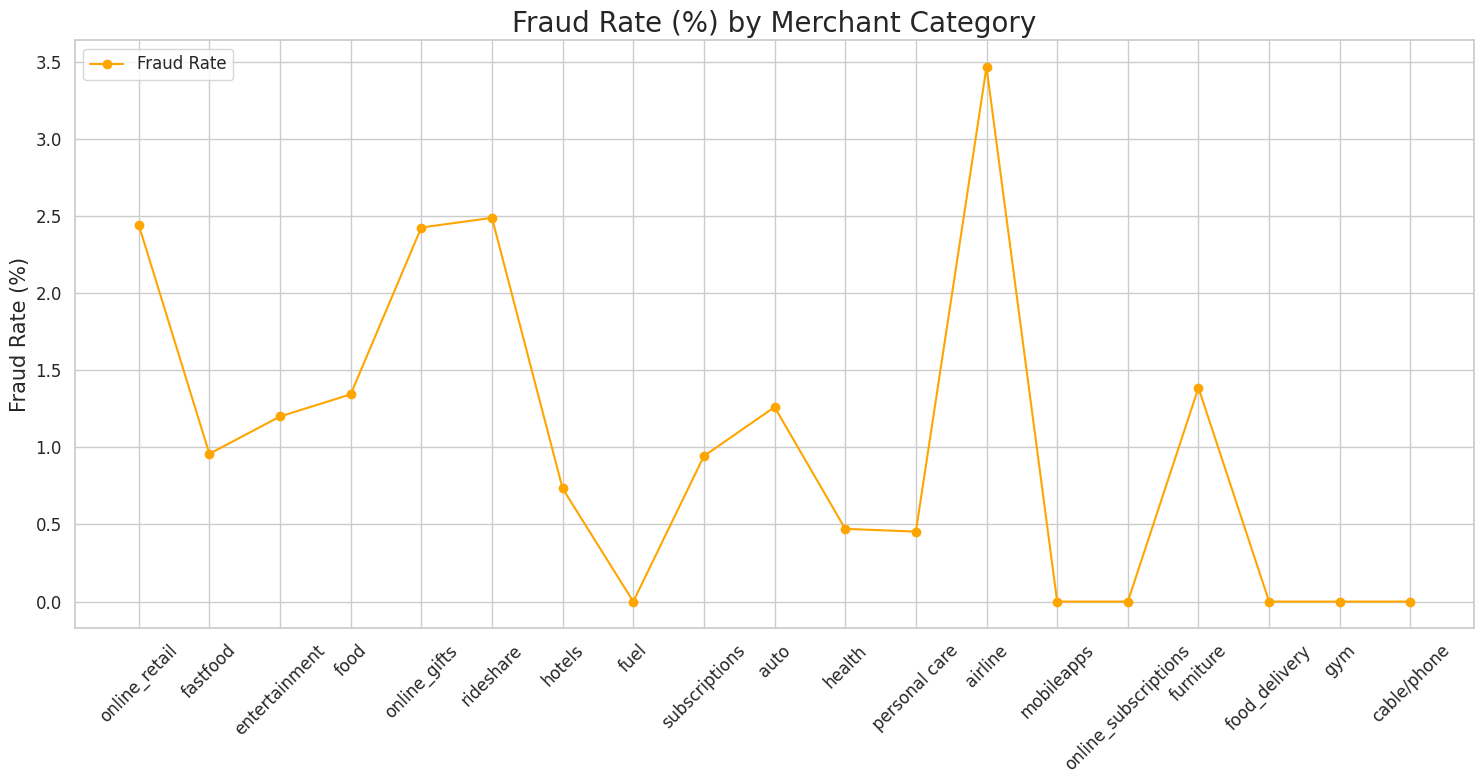

In [28]:
# line plot: fraud rate by Merchant Category



sns.set_theme(style="whitegrid")



# Initialize the matplotlib figure

f, ax = plt.subplots(figsize=(15, 8))



# plotting line for fraud rate

ax.plot(mc_fraud_summary["merchantCategoryCode"], mc_fraud_summary["fraud_rate"], linestyle='-', marker = 'o', color = 'orange', label="Fraud Rate")



ax.set_ylabel('Fraud Rate (%)', fontsize=15)



plt.title("Fraud Rate (%) by Merchant Category", loc='center',fontsize=20)

plt.xticks(fontsize=12, rotation=45)

plt.yticks(fontsize=12)



# Adding legends for both y-axes

ax.legend(loc="upper left", fontsize=12)



# Adjust layout to prevent overlap

f.tight_layout()



# Display plot

plt.show()

**3.4 Inspecting Transaction Type**

In [29]:
grouped_df = df['transactionType'].value_counts().reset_index(drop=False)

grouped_df.columns=['TransactionType','Frequency']

grouped_df = pd.DataFrame(grouped_df)

grouped_df

,TransactionType,Frequency
0,PURCHASE,745193
1,REVERSAL,20303
2,ADDRESS_VERIFICATION,20169


Text(0, 0.5, 'Frequency')

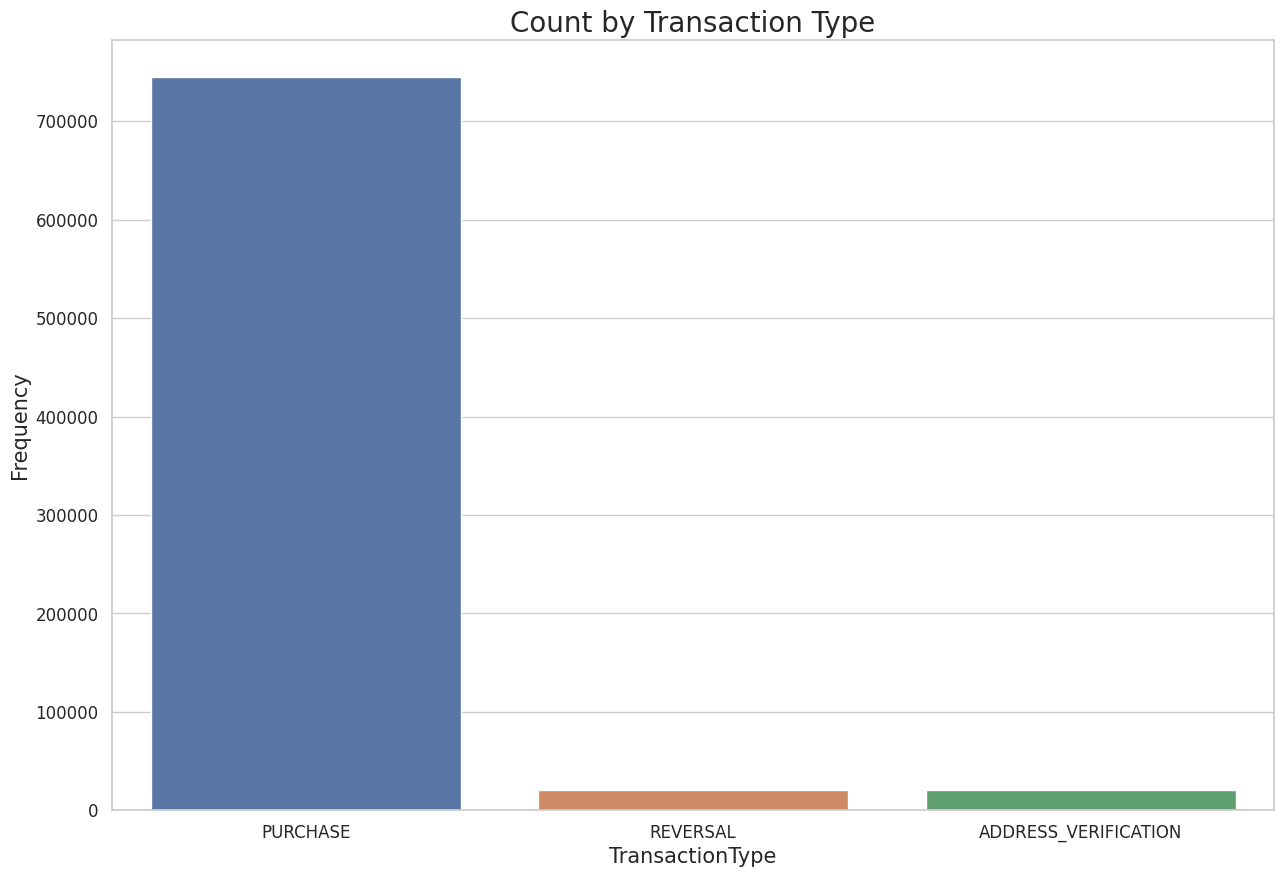

In [30]:
sns.set_theme(style="whitegrid")



# Initialize the matplotlib figure

f, ax = plt.subplots(figsize=(15, 10))



# plotting a bar plot

bar1 = sns.barplot(x="TransactionType", y="Frequency", data=grouped_df, label="Transactions count")



# formatting tick size

plt.xticks(fontsize=12)

plt.yticks(fontsize=12)



# setting title and label

plt.title("Count by Transaction Type", loc='center',fontsize=20)

plt.xlabel('TransactionType',fontsize=15)

plt.ylabel('Frequency',fontsize=15)

In [31]:
# inspecting ADDRESS_VERIFICATION Transaction Type

df[df['transactionType']=='ADDRESS_VERIFICATION'].transactionAmount.sum()

0.0

In [32]:
df[df['transactionType']=='ADDRESS_VERIFICATION'].isFraud.sum()

116

**3.5 Inspecting Credit Limit**

In [33]:
# unique Credit Limit

df['creditLimit'].nunique()

10

In [34]:
# calculating fraud rate and total transaction volume for each "Credit Limit"



cl_fraud_summary = df.groupby('creditLimit').agg(

    total_transactions=('isFraud', 'count'),

    total_fraud=('isFraud', 'sum')

)



cl_fraud_summary['fraud_rate'] = (cl_fraud_summary['total_fraud'] / cl_fraud_summary['total_transactions'])*100

cl_fraud_summary = cl_fraud_summary.reset_index()

cl_fraud_summary = cl_fraud_summary.sort_values(by='creditLimit')

cl_fraud_summary = pd.DataFrame(cl_fraud_summary)

cl_fraud_summary

,creditLimit,total_transactions,total_fraud,fraud_rate
0,250,34025,407,1.196179
1,500,27097,465,1.716057
2,1000,36430,546,1.498765
3,2500,75429,1116,1.479537
4,5000,201863,3527,1.747225
5,7500,97913,1290,1.317496
6,10000,56889,766,1.346482
7,15000,139307,2545,1.826900
8,20000,68629,914,1.331799
9,50000,48781,841,1.724032


Text(0, 0.5, 'Frequency')

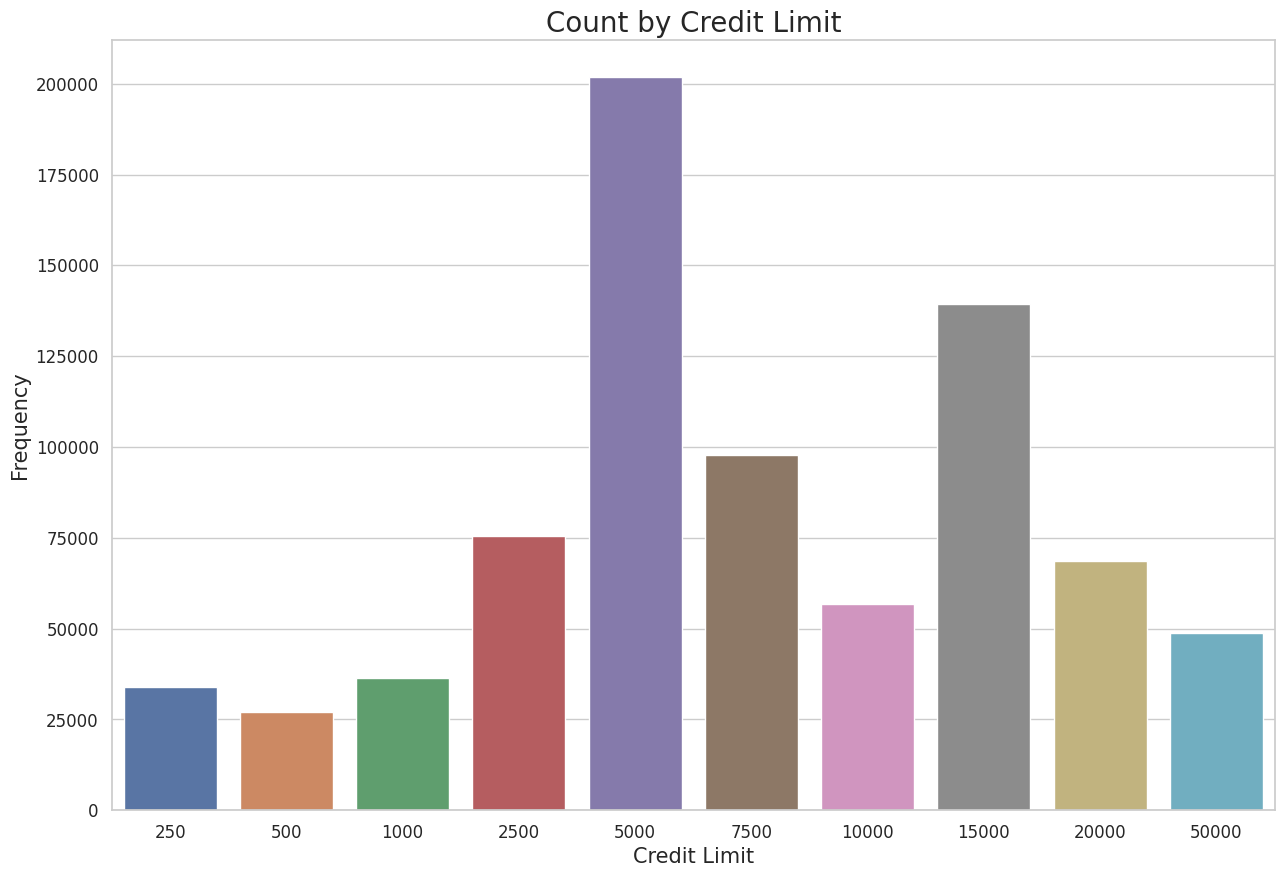

In [35]:
sns.set_theme(style="whitegrid")



# Initialize the matplotlib figure

f, ax = plt.subplots(figsize=(15, 10))



# plotting a bar plot

bar1 = sns.barplot(x="creditLimit", y="total_transactions", data=cl_fraud_summary, label="Transactions count")



# formatting tick size

plt.xticks(fontsize=12)

plt.yticks(fontsize=12)



# setting title and label

plt.title("Count by Credit Limit", loc='center',fontsize=20)

plt.xlabel('Credit Limit',fontsize=15)

plt.ylabel('Frequency',fontsize=15)

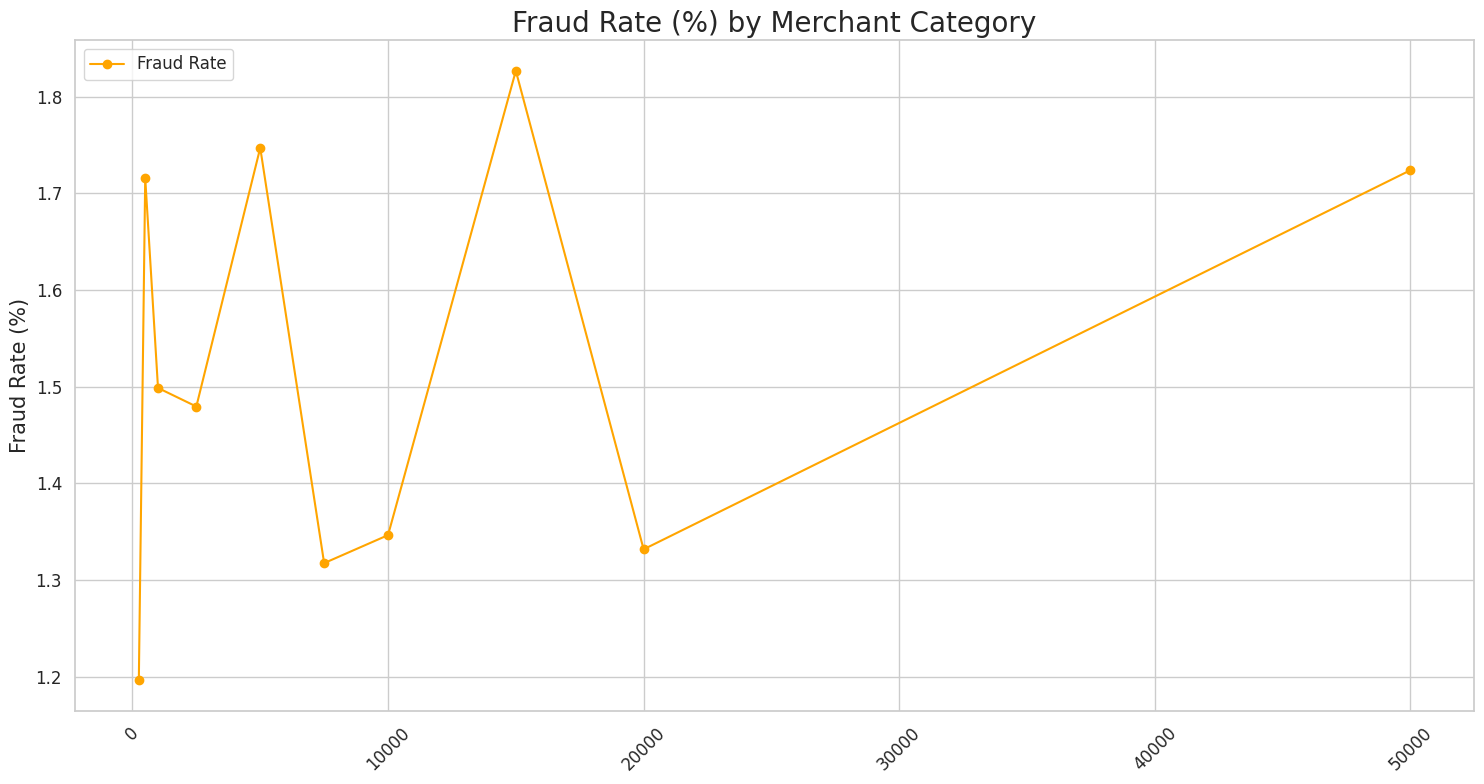

In [36]:
# line plot: fraud rate by Merchant Category



sns.set_theme(style="whitegrid")



# Initialize the matplotlib figure

f, ax = plt.subplots(figsize=(15, 8))



# plotting line for fraud rate

ax.plot(cl_fraud_summary["creditLimit"], cl_fraud_summary["fraud_rate"], linestyle='-', marker = 'o', color = 'orange', label="Fraud Rate")



ax.set_ylabel('Fraud Rate (%)', fontsize=15)



plt.title("Fraud Rate (%) by Credit Limit", loc='center',fontsize=20)

plt.xticks(fontsize=12, rotation=45)

plt.yticks(fontsize=12)



# Adding legends for both y-axes

ax.legend(loc="upper left", fontsize=12)



# Adjust layout to prevent overlap

f.tight_layout()



# Display plot

plt.show()

**3.6 Inspecting boolean columns**

In [37]:
# inspecting cardPresent

df['cardPresent'].value_counts()

cardPresent
False    433495
True     352868
Name: count, dtype: int64

In [38]:
# inspecting expirationDateKeyInMatch

df['expirationDateKeyInMatch'].value_counts()

expirationDateKeyInMatch
False    785320
True       1043
Name: count, dtype: int64

In [39]:
# inspecting isFraud

df['isFraud'].value_counts()

isFraud
False    773946
True      12417
Name: count, dtype: int64

# **4. Data Preprocessing**

**4.1 Inspecting reversal transactions**

Approach 1: Transactions where Transaction Type == REVERSAL

In [40]:
reversal_df = df[df['transactionType']=='REVERSAL']

In [41]:
reversal_df.head()

,accountNumber,customerId,creditLimit,availableMoney,transactionDateTime,transactionAmount,merchantName,acqCountry,merchantCountryCode,posEntryMode,posConditionCode,merchantCategoryCode,currentExpDate,accountOpenDate,dateOfLastAddressChange,cardCVV,enteredCVV,cardLast4Digits,transactionType,echoBuffer,currentBalance,merchantCity,merchantState,merchantZip,cardPresent,posOnPremises,recurringAuthInd,expirationDateKeyInMatch,isFraud
39,574788567,574788567,2500,2200.98,2016-05-24T01:38:03,215.13,Convenient Tire,US,US,09,01,auto,10/2021,2015-10-13,2015-10-13,206,206,8522,REVERSAL,NaN,299.02,NaN,NaN,NaN,True,NaN,NaN,False,False
73,574788567,574788567,2500,2432.72,2016-10-07T10:23:57,3.87,Eazy Repair,US,US,05,01,auto,10/2022,2015-10-13,2015-10-13,579,579,4219,REVERSAL,NaN,67.28,NaN,NaN,NaN,True,NaN,NaN,False,False
101,924729945,924729945,50000,49831.43,2016-10-19T14:01:45,168.57,discount.com,US,US,05,01,online_retail,11/2024,2014-07-25,2014-07-25,205,265,9459,REVERSAL,NaN,168.57,NaN,NaN,NaN,False,NaN,NaN,False,False
133,984504651,984504651,50000,46367.41,2016-01-16T09:53:15,450.74,Planet Fitness #849960,US,US,05,01,health,08/2028,2015-07-27,2015-07-27,640,640,8332,REVERSAL,NaN,3632.59,NaN,NaN,NaN,False,NaN,NaN,False,False
156,984504651,984504651,50000,41909.30,2016-01-25T20:39:15,81.73,AMC #724446,US,US,09,01,entertainment,12/2031,2015-07-27,2015-07-27,640,640,8332,REVERSAL,NaN,8090.70,NaN,NaN,NaN,True,NaN,NaN,False,False


In [42]:
reversal_df['transactionAmount'].sum()

2821792.5

Approach 2: Sort transactions in ascending order and look for consecutive transactions with same merchant, account, transaction amount where 'reversal' is followed by 'purchase'

In [43]:
sorted_df = df.sort_values(by=['accountNumber', 'merchantName', 'transactionDateTime'], ascending=True)

sorted_df[['accountNumber',  'merchantName', 'transactionAmount', 'transactionDateTime']]

,accountNumber,merchantName,transactionAmount,transactionDateTime
541917,100088067,1st BBQ,200.12,2016-04-08T19:56:36
541962,100088067,1st Pub,95.11,2016-11-09T07:26:06
541920,100088067,1st Sandwitch Bar #758805,5.26,2016-05-06T02:54:01
541904,100088067,34th BBQ #412895,141.60,2016-02-03T04:48:54
541925,100088067,AMC #191138,304.15,2016-06-03T18:50:55
...,...,...,...,...
108113,999389635,Play Store,4.62,2016-10-23T16:47:41
108114,999389635,Play Store,4.62,2016-11-24T00:21:46
108115,999389635,Play Store,4.62,2016-12-24T05:19:30
108109,999389635,oldnavy.com,42.98,2016-08-04T20:27:36


In [44]:
reversed_transactions = []

for i in range(len(sorted_df) - 1):

    current = sorted_df.iloc[i]

    next_row = sorted_df.iloc[i + 1]



    # Check for a "PURCHASE" followed by a "REVERSAL" with the same details

    if (current['transactionType'] == 'PURCHASE' and

        next_row['transactionType'] == 'REVERSAL' and

        current['accountNumber'] == next_row['accountNumber'] and

        current['merchantName'] == next_row['merchantName'] and

        current['transactionAmount'] == next_row['transactionAmount']):



        # Append both rows to reversed_transactions

        reversed_transactions.append(current)

        reversed_transactions.append(next_row)



# Convert list of reversed transactions to a DataFrame

reversed_df = pd.DataFrame(reversed_transactions)

In [45]:
reversed_df[['accountNumber',  'merchantName', 'transactionAmount', 'transactionDateTime','transactionType']]

,accountNumber,merchantName,transactionAmount,transactionDateTime,transactionType
541963,100088067,AMC #79863,22.32,2016-11-20T07:57:05,PURCHASE
541964,100088067,AMC #79863,22.32,2016-11-20T08:00:04,REVERSAL
87919,100328049,Lyft,43.74,2016-01-15T20:34:35,PURCHASE
87920,100328049,Lyft,43.74,2016-01-15T20:36:18,REVERSAL
87935,100328049,McDonalds #423357,284.97,2016-03-24T22:57:15,PURCHASE
...,...,...,...,...,...
670109,999283629,Franks Sandwitch Bar,150.58,2016-11-19T18:48:08,REVERSAL
670051,999283629,Lyft,96.56,2016-06-01T23:34:21,PURCHASE
670052,999283629,Lyft,96.56,2016-06-07T18:32:39,REVERSAL
670084,999283629,apple.com,407.23,2016-09-15T06:35:31,PURCHASE


In [46]:
reversed_df[reversed_df['transactionType']=='REVERSAL']

,accountNumber,customerId,creditLimit,availableMoney,transactionDateTime,transactionAmount,merchantName,acqCountry,merchantCountryCode,posEntryMode,posConditionCode,merchantCategoryCode,currentExpDate,accountOpenDate,dateOfLastAddressChange,cardCVV,enteredCVV,cardLast4Digits,transactionType,echoBuffer,currentBalance,merchantCity,merchantState,merchantZip,cardPresent,posOnPremises,recurringAuthInd,expirationDateKeyInMatch,isFraud
541964,100088067,100088067,50000,49811.88,2016-11-20T08:00:04,22.32,AMC #79863,US,US,09,01,entertainment,06/2020,2014-01-09,2014-01-09,546,546,4615,REVERSAL,NaN,188.12,NaN,NaN,NaN,True,NaN,NaN,False,False
87920,100328049,100328049,5000,4605.10,2016-01-15T20:36:18,43.74,Lyft,US,US,09,08,rideshare,05/2027,2014-01-07,2014-01-07,206,206,2941,REVERSAL,NaN,394.90,NaN,NaN,NaN,False,NaN,NaN,False,False
87936,100328049,100328049,5000,3792.09,2016-03-26T17:35:09,284.97,McDonalds #423357,US,US,02,08,fastfood,10/2027,2014-01-07,2014-01-07,206,206,2941,REVERSAL,NaN,1207.91,NaN,NaN,NaN,True,NaN,NaN,False,False
151499,100737756,100737756,250,119.51,2016-06-06T22:56:52,93.67,34th BBQ #436606,US,US,05,01,food,05/2026,2015-06-21,2015-06-21,463,463,4317,REVERSAL,NaN,130.49,NaN,NaN,NaN,True,NaN,NaN,False,False
151541,100737756,100737756,250,144.52,2016-08-24T20:21:19,501.29,Best Bistro #262998,US,US,05,01,food,07/2021,2015-06-21,2015-06-21,463,463,4317,REVERSAL,NaN,105.48,NaN,NaN,NaN,True,NaN,NaN,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
545581,999258704,999258704,5000,4865.17,2016-09-02T03:33:07,72.93,gap.com,US,US,09,01,online_retail,05/2025,2015-12-22,2015-12-22,708,708,3757,REVERSAL,NaN,134.83,NaN,NaN,NaN,False,NaN,NaN,False,False
670038,999283629,999283629,2500,2500.00,2016-05-01T05:42:19,247.40,Delta Airlines,US,US,05,01,airline,08/2021,2015-11-08,2016-03-09,919,919,4157,REVERSAL,NaN,0.00,NaN,NaN,NaN,False,NaN,NaN,False,False
670109,999283629,999283629,2500,2034.10,2016-11-19T18:48:08,150.58,Franks Sandwitch Bar,US,US,09,01,food,03/2030,2015-11-08,2016-03-09,489,489,3016,REVERSAL,NaN,465.90,NaN,NaN,NaN,True,NaN,NaN,False,False
670052,999283629,999283629,2500,2403.44,2016-06-07T18:32:39,96.56,Lyft,US,US,05,08,rideshare,06/2029,2015-11-08,2016-03-09,489,489,3016,REVERSAL,NaN,96.56,NaN,NaN,NaN,False,NaN,NaN,False,False


Approach 3: Transactions with same merchant, account, transaction amount where 'reversal' is followed by 'purchase', but need not be consecutive

In [47]:
# Separate purchases and reversals into two DataFrames

purchases = df[df['transactionType'] == 'PURCHASE']

reversals = df[df['transactionType'] == 'REVERSAL']



# Merge to find matching purchase and reversal pairs

merged = pd.merge(

    purchases, reversals,

    on=['accountNumber', 'merchantName', 'transactionAmount'],

    suffixes=('_purchase', '_reversal')

)



# Filter to ensure that the reversal happens after the purchase

reversed_transactions = merged[merged['transactionDateTime_reversal'] > merged['transactionDateTime_purchase']]

In [48]:
reversed_transactions[['accountNumber',  'merchantName', 'transactionAmount', 'transactionDateTime_purchase','transactionType_purchase','transactionDateTime_reversal','transactionType_reversal']]

,accountNumber,merchantName,transactionAmount,transactionDateTime_purchase,transactionType_purchase,transactionDateTime_reversal,transactionType_reversal
0,574788567,Convenient Tire,215.13,2016-05-24T01:35:33,PURCHASE,2016-05-24T01:38:03,REVERSAL
1,924729945,discount.com,168.57,2016-10-04T04:20:04,PURCHASE,2016-10-19T14:01:45,REVERSAL
2,984504651,1st Sandwitch Bar #801388,83.64,2016-01-06T04:08:06,PURCHASE,2016-02-04T00:14:42,REVERSAL
3,984504651,Planet Fitness #849960,450.74,2016-01-16T09:52:30,PURCHASE,2016-01-16T09:53:15,REVERSAL
4,984504651,AMC #724446,81.73,2016-01-17T08:13:08,PURCHASE,2016-01-25T20:39:15,REVERSAL
...,...,...,...,...,...,...,...
18138,205026043,Lyft,56.26,2016-09-18T06:07:17,PURCHASE,2016-09-18T06:08:02,REVERSAL
18139,288358186,ebay.com,20.66,2016-08-02T18:42:42,PURCHASE,2016-08-28T11:21:32,REVERSAL
18140,638498773,KFC #928167,201.79,2016-01-01T19:45:47,PURCHASE,2016-01-01T19:48:03,REVERSAL
18141,638498773,Dunkin' Donuts #396342,86.14,2016-10-09T04:52:23,PURCHASE,2016-11-03T04:23:26,REVERSAL


**4.2 Inspecting Multi Swipe Transactions**

In [49]:
sorted_df['transactionDateTime'] = pd.to_datetime(sorted_df['transactionDateTime'])

In [50]:
sorted_df['prev_transaction_amount'] = sorted_df.groupby('accountNumber')['transactionAmount'].shift(1)

sorted_df['prev_transaction_datetime'] = sorted_df.groupby('accountNumber')['transactionDateTime'].shift(1)

In [51]:
sorted_df.head(10)

,accountNumber,customerId,creditLimit,availableMoney,transactionDateTime,transactionAmount,merchantName,acqCountry,merchantCountryCode,posEntryMode,posConditionCode,merchantCategoryCode,currentExpDate,accountOpenDate,dateOfLastAddressChange,cardCVV,enteredCVV,cardLast4Digits,transactionType,echoBuffer,currentBalance,merchantCity,merchantState,merchantZip,cardPresent,posOnPremises,recurringAuthInd,expirationDateKeyInMatch,isFraud,prev_transaction_amount,prev_transaction_datetime
541917,100088067,100088067,50000,49953.81,2016-04-08 19:56:36,200.12,1st BBQ,US,US,09,01,food,07/2029,2014-01-09,2014-01-09,546,546,4615,PURCHASE,NaN,46.19,NaN,NaN,NaN,True,NaN,NaN,False,False,NaN,NaT
541962,100088067,100088067,50000,49929.31,2016-11-09 07:26:06,95.11,1st Pub,US,US,02,01,food,04/2021,2014-01-09,2014-01-09,402,402,2077,PURCHASE,NaN,70.69,NaN,NaN,NaN,True,NaN,NaN,False,False,200.12,2016-04-08 19:56:36
541920,100088067,100088067,50000,49996.04,2016-05-06 02:54:01,5.26,1st Sandwitch Bar #758805,US,US,02,01,food,07/2033,2014-01-09,2014-01-09,546,546,4615,PURCHASE,NaN,3.96,NaN,NaN,NaN,True,NaN,NaN,False,False,95.11,2016-11-09 07:26:06
541904,100088067,100088067,50000,49933.93,2016-02-03 04:48:54,141.60,34th BBQ #412895,US,US,09,08,food,11/2030,2014-01-09,2014-01-09,546,546,4615,PURCHASE,NaN,66.07,NaN,NaN,NaN,True,NaN,NaN,False,False,5.26,2016-05-06 02:54:01
541925,100088067,100088067,50000,50000.00,2016-06-03 18:50:55,304.15,AMC #191138,US,US,02,01,entertainment,11/2032,2014-01-09,2014-01-09,546,546,4615,PURCHASE,NaN,0.00,NaN,NaN,NaN,True,NaN,NaN,False,False,141.60,2016-02-03 04:48:54
541951,100088067,100088067,50000,48972.87,2016-09-29 03:23:32,485.92,AMC #552863,US,US,09,01,entertainment,03/2028,2014-01-09,2014-01-09,402,402,2077,PURCHASE,NaN,1027.13,NaN,NaN,NaN,True,NaN,NaN,False,False,304.15,2016-06-03 18:50:55
541958,100088067,100088067,50000,48803.33,2016-10-27 10:32:16,53.45,AMC #552863,US,US,02,01,entertainment,01/2024,2014-01-09,2014-01-09,546,546,4615,PURCHASE,NaN,1196.67,NaN,NaN,NaN,True,NaN,NaN,False,False,485.92,2016-09-29 03:23:32
541909,100088067,100088067,50000,49421.28,2016-02-21 01:14:56,71.35,AMC #724446,US,US,09,01,entertainment,03/2024,2014-01-09,2014-01-09,546,546,4615,PURCHASE,NaN,578.72,NaN,NaN,NaN,True,NaN,NaN,True,False,53.45,2016-10-27 10:32:16
541946,100088067,100088067,50000,49863.35,2016-09-18 06:13:27,55.04,AMC #724446,US,US,05,01,entertainment,07/2032,2014-01-09,2014-01-09,402,402,2077,PURCHASE,NaN,136.65,NaN,NaN,NaN,True,NaN,NaN,False,False,71.35,2016-02-21 01:14:56
541954,100088067,100088067,50000,49935.63,2016-10-10 07:15:50,249.19,AMC #724446,US,US,02,01,entertainment,08/2027,2014-01-09,2014-01-09,546,546,4615,PURCHASE,NaN,64.37,NaN,NaN,NaN,True,NaN,NaN,False,False,55.04,2016-09-18 06:13:27


In [52]:
time_window = timedelta(minutes=3)



sorted_df['isMultiSwipe'] = ((sorted_df['transactionAmount'] == sorted_df['prev_transaction_amount']) &

                            (sorted_df['transactionDateTime'] - sorted_df['prev_transaction_datetime'] <= time_window))

In [53]:
multi_swipe_df = sorted_df[sorted_df['isMultiSwipe'] == True]

multi_swipe_df

,accountNumber,customerId,creditLimit,availableMoney,transactionDateTime,transactionAmount,merchantName,acqCountry,merchantCountryCode,posEntryMode,posConditionCode,merchantCategoryCode,currentExpDate,accountOpenDate,dateOfLastAddressChange,cardCVV,enteredCVV,cardLast4Digits,transactionType,echoBuffer,currentBalance,merchantCity,merchantState,merchantZip,cardPresent,posOnPremises,recurringAuthInd,expirationDateKeyInMatch,isFraud,prev_transaction_amount,prev_transaction_datetime,isMultiSwipe
541964,100088067,100088067,50000,49811.88,2016-11-20 08:00:04,22.32,AMC #79863,US,US,09,01,entertainment,06/2020,2014-01-09,2014-01-09,546,546,4615,REVERSAL,NaN,188.12,NaN,NaN,NaN,True,NaN,NaN,False,False,22.32,2016-11-20 07:57:05,True
541956,100088067,100088067,50000,49275.09,2016-10-16 18:01:02,411.35,Fresh Flowers,US,US,02,08,online_gifts,12/2019,2014-01-09,2014-01-09,402,402,2077,PURCHASE,NaN,724.91,NaN,NaN,NaN,False,NaN,NaN,False,False,411.35,2016-10-16 18:01:00,True
87920,100328049,100328049,5000,4605.10,2016-01-15 20:36:18,43.74,Lyft,US,US,09,08,rideshare,05/2027,2014-01-07,2014-01-07,206,206,2941,REVERSAL,NaN,394.90,NaN,NaN,NaN,False,NaN,NaN,False,False,43.74,2016-01-15 20:34:35,True
151518,100737756,100737756,250,177.98,2016-07-10 14:32:06,43.25,34th BBQ #166379,US,US,02,01,food,03/2029,2015-06-21,2015-06-21,463,463,4317,PURCHASE,NaN,72.02,NaN,NaN,NaN,True,NaN,NaN,False,False,43.25,2016-07-10 14:31:07,True
151427,100737756,100737756,250,-44.75,2016-01-18 01:55:28,693.50,Franks Deli,US,US,05,01,food,03/2025,2015-06-21,2015-06-21,463,463,4317,PURCHASE,NaN,294.75,NaN,NaN,NaN,True,NaN,NaN,False,False,693.50,2016-01-18 01:55:24,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
569654,999257059,999257059,15000,14177.84,2016-01-14 16:51:22,47.58,Wall Street News,US,US,09,01,subscriptions,12/2019,2015-10-25,2015-10-25,959,959,8291,PURCHASE,NaN,822.16,NaN,NaN,NaN,False,NaN,NaN,False,False,47.58,2016-01-14 16:48:41,True
569751,999257059,999257059,15000,14322.20,2016-08-09 11:25:46,557.11,Washington Times,US,US,05,01,subscriptions,05/2032,2015-10-25,2015-10-25,959,959,8291,REVERSAL,NaN,677.80,NaN,NaN,NaN,False,NaN,NaN,False,False,557.11,2016-08-09 11:25:29,True
545536,999258704,999258704,5000,4246.82,2016-03-16 07:14:17,367.13,Uber,US,US,09,01,rideshare,03/2020,2015-12-22,2015-12-22,708,708,3757,REVERSAL,NaN,753.18,NaN,NaN,NaN,False,NaN,NaN,False,False,367.13,2016-03-16 07:13:48,True
545581,999258704,999258704,5000,4865.17,2016-09-02 03:33:07,72.93,gap.com,US,US,09,01,online_retail,05/2025,2015-12-22,2015-12-22,708,708,3757,REVERSAL,NaN,134.83,NaN,NaN,NaN,False,NaN,NaN,False,False,72.93,2016-09-02 03:31:57,True


In [54]:
multi_swipe_df.transactionAmount.sum()

1931990.0399999998

In [55]:
sorted_df[(sorted_df['accountNumber']==100088067) & (sorted_df['transactionAmount']== 411.35)][['accountNumber',  'merchantName', 'transactionAmount', 'transactionDateTime','prev_transaction_amount','prev_transaction_datetime','transactionType','isMultiSwipe']]

,accountNumber,merchantName,transactionAmount,transactionDateTime,prev_transaction_amount,prev_transaction_datetime,transactionType,isMultiSwipe
541955,100088067,Fresh Flowers,411.35,2016-10-16 18:01:00,21.59,2016-09-02 03:40:54,PURCHASE,False
541956,100088067,Fresh Flowers,411.35,2016-10-16 18:01:02,411.35,2016-10-16 18:01:00,PURCHASE,True


In [56]:
sorted_df[(sorted_df['accountNumber']==100737756) & (sorted_df['transactionAmount']== 693.50)][['accountNumber',  'merchantName', 'transactionAmount', 'transactionDateTime','prev_transaction_amount','prev_transaction_datetime','transactionType','isMultiSwipe']]

,accountNumber,merchantName,transactionAmount,transactionDateTime,prev_transaction_amount,prev_transaction_datetime,transactionType,isMultiSwipe
151426,100737756,Franks Deli,693.5,2016-01-18 01:55:24,83.32,2016-12-11 20:11:14,PURCHASE,False
151427,100737756,Franks Deli,693.5,2016-01-18 01:55:28,693.50,2016-01-18 01:55:24,PURCHASE,True
151428,100737756,Franks Deli,693.5,2016-01-18 01:58:26,693.50,2016-01-18 01:55:28,PURCHASE,True


## **5. Data Cleaning**

In [57]:
clean_df = sorted_df[sorted_df['isMultiSwipe'] == False]

clean_df = clean_df[clean_df['transactionType'] == 'PURCHASE']

In [58]:
clean_df

,accountNumber,customerId,creditLimit,availableMoney,transactionDateTime,transactionAmount,merchantName,acqCountry,merchantCountryCode,posEntryMode,posConditionCode,merchantCategoryCode,currentExpDate,accountOpenDate,dateOfLastAddressChange,cardCVV,enteredCVV,cardLast4Digits,transactionType,echoBuffer,currentBalance,merchantCity,merchantState,merchantZip,cardPresent,posOnPremises,recurringAuthInd,expirationDateKeyInMatch,isFraud,prev_transaction_amount,prev_transaction_datetime,isMultiSwipe
541917,100088067,100088067,50000,49953.81,2016-04-08 19:56:36,200.12,1st BBQ,US,US,09,01,food,07/2029,2014-01-09,2014-01-09,546,546,4615,PURCHASE,NaN,46.19,NaN,NaN,NaN,True,NaN,NaN,False,False,NaN,NaT,False
541962,100088067,100088067,50000,49929.31,2016-11-09 07:26:06,95.11,1st Pub,US,US,02,01,food,04/2021,2014-01-09,2014-01-09,402,402,2077,PURCHASE,NaN,70.69,NaN,NaN,NaN,True,NaN,NaN,False,False,200.12,2016-04-08 19:56:36,False
541920,100088067,100088067,50000,49996.04,2016-05-06 02:54:01,5.26,1st Sandwitch Bar #758805,US,US,02,01,food,07/2033,2014-01-09,2014-01-09,546,546,4615,PURCHASE,NaN,3.96,NaN,NaN,NaN,True,NaN,NaN,False,False,95.11,2016-11-09 07:26:06,False
541904,100088067,100088067,50000,49933.93,2016-02-03 04:48:54,141.60,34th BBQ #412895,US,US,09,08,food,11/2030,2014-01-09,2014-01-09,546,546,4615,PURCHASE,NaN,66.07,NaN,NaN,NaN,True,NaN,NaN,False,False,5.26,2016-05-06 02:54:01,False
541925,100088067,100088067,50000,50000.00,2016-06-03 18:50:55,304.15,AMC #191138,US,US,02,01,entertainment,11/2032,2014-01-09,2014-01-09,546,546,4615,PURCHASE,NaN,0.00,NaN,NaN,NaN,True,NaN,NaN,False,False,141.60,2016-02-03 04:48:54,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
108113,999389635,999389635,5000,4674.08,2016-10-23 16:47:41,4.62,Play Store,US,US,05,01,mobileapps,04/2033,2015-10-09,2015-10-09,140,140,3991,PURCHASE,NaN,325.92,NaN,NaN,NaN,False,NaN,NaN,False,False,4.62,2016-09-22 13:58:30,False
108114,999389635,999389635,5000,4694.46,2016-11-24 00:21:46,4.62,Play Store,US,US,05,01,mobileapps,04/2033,2015-10-09,2015-10-09,140,140,3991,PURCHASE,NaN,305.54,NaN,NaN,NaN,False,NaN,NaN,False,False,4.62,2016-10-23 16:47:41,False
108115,999389635,999389635,5000,4714.84,2016-12-24 05:19:30,4.62,Play Store,US,US,05,01,mobileapps,04/2033,2015-10-09,2015-10-09,140,140,3991,PURCHASE,NaN,285.16,NaN,NaN,NaN,False,NaN,NaN,False,False,4.62,2016-11-24 00:21:46,False
108109,999389635,999389635,5000,4943.92,2016-08-04 20:27:36,42.98,oldnavy.com,US,US,09,01,online_retail,07/2023,2015-10-09,2015-10-09,140,140,3991,PURCHASE,NaN,56.08,NaN,NaN,NaN,False,NaN,NaN,False,False,4.62,2016-12-24 05:19:30,False


In [59]:
clean_df.drop(columns=['prev_transaction_amount', 'prev_transaction_datetime', 'isMultiSwipe','recurringAuthInd','posOnPremises',

                       'merchantZip','merchantState','merchantCity','echoBuffer'], inplace=True)

In [60]:
clean_df.columns

Index(['accountNumber', 'customerId', 'creditLimit', 'availableMoney',
       'transactionDateTime', 'transactionAmount', 'merchantName',
       'acqCountry', 'merchantCountryCode', 'posEntryMode', 'posConditionCode',
       'merchantCategoryCode', 'currentExpDate', 'accountOpenDate',
       'dateOfLastAddressChange', 'cardCVV', 'enteredCVV', 'cardLast4Digits',
       'transactionType', 'currentBalance', 'cardPresent',
       'expirationDateKeyInMatch', 'isFraud'],
      dtype='object')

In [61]:
clean_df = clean_df.dropna()

In [62]:
clean_df.shape

(729280, 23)



# **6. Feature Engineering**

In [63]:
transform_df = clean_df.copy()

In [64]:
transform_df['utilization_ratio'] = transform_df['currentBalance'] / transform_df['creditLimit']

In [65]:
transform_df['cvv_match'] = transform_df['cardCVV'] == transform_df['enteredCVV']

In [66]:
transform_df['country_match'] = transform_df['acqCountry'] == transform_df['merchantCountryCode']

In [67]:
transform_df['accountOpenDate'] = pd.to_datetime(transform_df['accountOpenDate'])

transform_df['dateOfLastAddressChange'] = pd.to_datetime(transform_df['dateOfLastAddressChange'])

In [68]:
# define threshold

days_threshold = pd.Timedelta(days=30)



# Feature 1: Account opened within the last 30 days of the transaction

transform_df['recent_account_open'] = (transform_df['transactionDateTime'] - transform_df['accountOpenDate']) <= days_threshold



# Feature 2: Address changed within the last 30 days of the transaction

transform_df['recent_address_change'] = (transform_df['transactionDateTime'] - transform_df['dateOfLastAddressChange']) <= days_threshold

In [69]:
transform_df['transaction_hour'] = transform_df['transactionDateTime'].dt.hour

In [70]:
transform_df['transaction_day_of_week'] = transform_df['transactionDateTime'].dt.dayofweek

In [71]:
transform_df.head()

,accountNumber,customerId,creditLimit,availableMoney,transactionDateTime,transactionAmount,merchantName,acqCountry,merchantCountryCode,posEntryMode,posConditionCode,merchantCategoryCode,currentExpDate,accountOpenDate,dateOfLastAddressChange,cardCVV,enteredCVV,cardLast4Digits,transactionType,currentBalance,cardPresent,expirationDateKeyInMatch,isFraud,utilization_ratio,cvv_match,country_match,recent_account_open,recent_address_change,transaction_hour,transaction_day_of_week
541917,100088067,100088067,50000,49953.81,2016-04-08 19:56:36,200.12,1st BBQ,US,US,09,01,food,07/2029,2014-01-09,2014-01-09,546,546,4615,PURCHASE,46.19,True,False,False,0.000924,True,True,False,False,19,4
541962,100088067,100088067,50000,49929.31,2016-11-09 07:26:06,95.11,1st Pub,US,US,02,01,food,04/2021,2014-01-09,2014-01-09,402,402,2077,PURCHASE,70.69,True,False,False,0.001414,True,True,False,False,7,2
541920,100088067,100088067,50000,49996.04,2016-05-06 02:54:01,5.26,1st Sandwitch Bar #758805,US,US,02,01,food,07/2033,2014-01-09,2014-01-09,546,546,4615,PURCHASE,3.96,True,False,False,0.000079,True,True,False,False,2,4
541904,100088067,100088067,50000,49933.93,2016-02-03 04:48:54,141.60,34th BBQ #412895,US,US,09,08,food,11/2030,2014-01-09,2014-01-09,546,546,4615,PURCHASE,66.07,True,False,False,0.001321,True,True,False,False,4,2
541925,100088067,100088067,50000,50000.00,2016-06-03 18:50:55,304.15,AMC #191138,US,US,02,01,entertainment,11/2032,2014-01-09,2014-01-09,546,546,4615,PURCHASE,0.00,True,False,False,0.000000,True,True,False,False,18,4


In [72]:
transform_df.drop(columns=['accountNumber','customerId','merchantName','cardLast4Digits','accountOpenDate','dateOfLastAddressChange','cardCVV','currentExpDate','enteredCVV','currentBalance','transactionDateTime','transactionType','acqCountry'], inplace=True)

In [73]:
transform_df.head()

,creditLimit,availableMoney,transactionAmount,merchantCountryCode,posEntryMode,posConditionCode,merchantCategoryCode,cardPresent,expirationDateKeyInMatch,isFraud,utilization_ratio,cvv_match,country_match,recent_account_open,recent_address_change,transaction_hour,transaction_day_of_week
541917,50000,49953.81,200.12,US,09,01,food,True,False,False,0.000924,True,True,False,False,19,4
541962,50000,49929.31,95.11,US,02,01,food,True,False,False,0.001414,True,True,False,False,7,2
541920,50000,49996.04,5.26,US,02,01,food,True,False,False,0.000079,True,True,False,False,2,4
541904,50000,49933.93,141.60,US,09,08,food,True,False,False,0.001321,True,True,False,False,4,2
541925,50000,50000.00,304.15,US,02,01,entertainment,True,False,False,0.000000,True,True,False,False,18,4


In [74]:
transform_df.shape

(729280, 17)

In [75]:
transform_df.columns

Index(['creditLimit', 'availableMoney', 'transactionAmount',
       'merchantCountryCode', 'posEntryMode', 'posConditionCode',
       'merchantCategoryCode', 'cardPresent', 'expirationDateKeyInMatch',
       'isFraud', 'utilization_ratio', 'cvv_match', 'country_match',
       'recent_account_open', 'recent_address_change', 'transaction_hour',
       'transaction_day_of_week'],
      dtype='object')

# **7. Feature Transformation**

In [76]:
from sklearn.model_selection import train_test_split, GridSearchCV, StratifiedKFold, cross_val_score

from sklearn.preprocessing import StandardScaler, LabelEncoder

from imblearn.over_sampling import SMOTE

from sklearn.ensemble import RandomForestClassifier

from sklearn.metrics import classification_report, roc_auc_score, precision_recall_curve, auc, make_scorer, confusion_matrix, accuracy_score

from sklearn.preprocessing import RobustScaler

from sklearn.linear_model import LogisticRegression

from sklearn import metrics

import xgboost as xgb

**7.1 One Hot Encoding**

In [77]:
# One-hot encoding for categorical columns

categorical_columns = ['merchantCountryCode', 'merchantCategoryCode']

transform_df = pd.get_dummies(transform_df, columns=categorical_columns, drop_first=True)

In [78]:
# encoding for boolean columns

boolean_columns = ['cardPresent', 'expirationDateKeyInMatch', 'cvv_match', 'country_match',

                   'recent_account_open', 'recent_address_change','isFraud']



transform_df[boolean_columns] = transform_df[boolean_columns].astype(int)

In [79]:
transform_df.head()

,creditLimit,availableMoney,transactionAmount,posEntryMode,posConditionCode,cardPresent,expirationDateKeyInMatch,isFraud,utilization_ratio,cvv_match,country_match,recent_account_open,recent_address_change,transaction_hour,transaction_day_of_week,merchantCountryCode_MEX,merchantCountryCode_PR,merchantCountryCode_US,merchantCategoryCode_auto,merchantCategoryCode_cable/phone,merchantCategoryCode_entertainment,merchantCategoryCode_fastfood,merchantCategoryCode_food,merchantCategoryCode_food_delivery,merchantCategoryCode_fuel,merchantCategoryCode_furniture,merchantCategoryCode_gym,merchantCategoryCode_health,merchantCategoryCode_hotels,merchantCategoryCode_mobileapps,merchantCategoryCode_online_gifts,merchantCategoryCode_online_retail,merchantCategoryCode_online_subscriptions,merchantCategoryCode_personal care,merchantCategoryCode_rideshare,merchantCategoryCode_subscriptions
541917,50000,49953.81,200.12,09,01,1,0,0,0.000924,1,1,0,0,19,4,False,False,True,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False
541962,50000,49929.31,95.11,02,01,1,0,0,0.001414,1,1,0,0,7,2,False,False,True,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False
541920,50000,49996.04,5.26,02,01,1,0,0,0.000079,1,1,0,0,2,4,False,False,True,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False
541904,50000,49933.93,141.60,09,08,1,0,0,0.001321,1,1,0,0,4,2,False,False,True,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False
541925,50000,50000.00,304.15,02,01,1,0,0,0.000000,1,1,0,0,18,4,False,False,True,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False


**7.2 Removing Target variables and Features**

In [80]:
# removing target variable and reassigning it to y

X=transform_df.drop('isFraud',axis=1).values

y=transform_df['isFraud']

**7.3 Scaling numerical columns**

In [81]:
# apply RobustScaler to handle skewness and outliers

scaler = RobustScaler()

X_scaled = scaler.fit_transform(X)

**7.4 Test Train Split**

In [82]:
# perform train test split with stratification

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.25, random_state=42, stratify=y)

**7.5 Using SMOTE to handle class imbalance**

In [83]:
# applying SMOTE to minority class

smote = SMOTE(random_state=42)

X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

In [84]:
X_train_resampled.shape

(1076814, 35)

In [85]:
y_train_resampled.shape

(1076814,)

# **8. Modelling**

**8.1 Logistic Regression**

In [86]:
logit = LogisticRegression(class_weight='balanced', solver='liblinear', max_iter=1000)

In [87]:
param_grid = {

    'C': [1, 10, 100, 200, 500, 1000],

    'penalty': ['l1', 'l2']

}

In [88]:
# Using F1 Score as the scoring metric for imbalanced data

logit_clf = GridSearchCV(logit, param_grid, cv=5, scoring='f1', verbose=1, n_jobs=-1)

logit_clf.fit(X_train_resampled, y_train_resampled)



# Display the best parameters from Grid Search

print("Best Parameters from Grid Search:", logit_clf.best_params_)

Fitting 5 folds for each of 12 candidates, totalling 60 fits
Best Parameters from Grid Search: {'C': 500, 'penalty': 'l2'}


In [89]:
# Use the best parameters to initialize Logistic Regression

best_logit = LogisticRegression(

    penalty=logit_clf.best_params_['penalty'],

    C=logit_clf.best_params_['C'],

    class_weight='balanced',

    solver='liblinear',

    max_iter=1000

)

best_logit.fit(X_train_resampled, y_train_resampled)

LogisticRegression(C=500, class_weight='balanced', max_iter=1000,
                   solver='liblinear')

In [90]:
# Predictions on the test set

y_pred = best_logit.predict(X_test)



# Classification report

print("Classification Report:\n", classification_report(y_test, y_pred))



# Accuracy

print("Test Accuracy: {:.4f}".format(accuracy_score(y_test, y_pred)))

Classification Report:
               precision    recall  f1-score   support

           0       0.99      0.59      0.74    179469
           1       0.03      0.71      0.05      2851

    accuracy                           0.59    182320
   macro avg       0.51      0.65      0.39    182320
weighted avg       0.98      0.59      0.73    182320

Test Accuracy: 0.5896


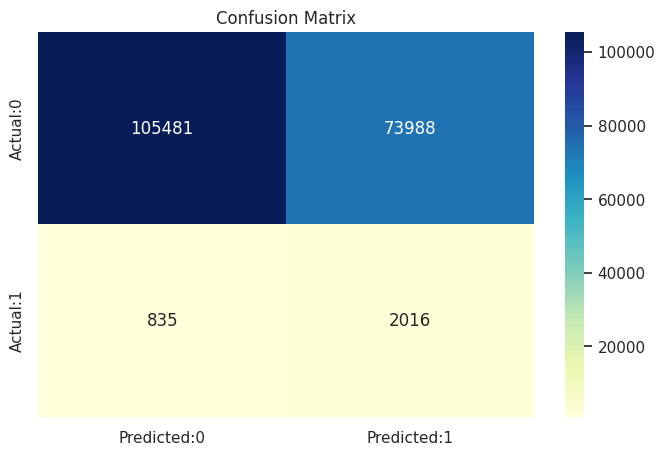

In [91]:
cm = confusion_matrix(y_test, y_pred)

conf_matrix = pd.DataFrame(data=cm, columns=['Predicted:0', 'Predicted:1'], index=['Actual:0', 'Actual:1'])



# Plotting Confusion Matrix

plt.figure(figsize=(8, 5))

sns.heatmap(conf_matrix, annot=True, fmt='d', cmap="YlGnBu")

plt.title("Confusion Matrix")

plt.show()

Precision-Recall AUC: 0.0383


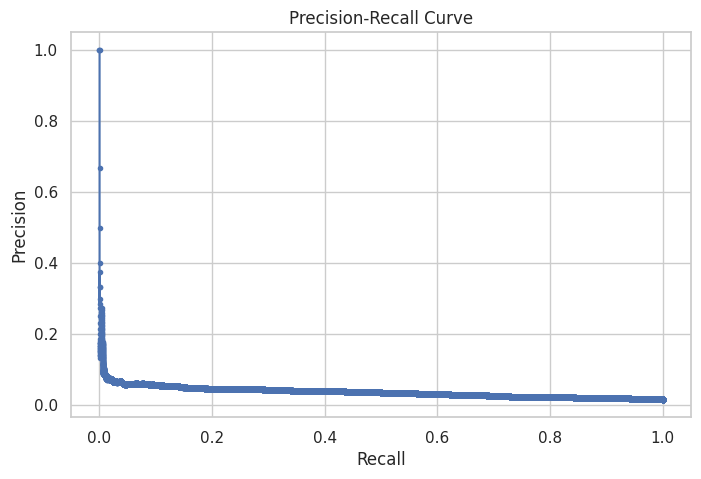

In [92]:
# Predicted probabilities for the positive class

y_scores = best_logit.predict_proba(X_test)[:, 1]



# Calculate Precision-Recall curve

precision, recall, _ = precision_recall_curve(y_test, y_scores)

pr_auc = auc(recall, precision)

print(f"Precision-Recall AUC: {pr_auc:.4f}")



# Plot Precision-Recall Curve

plt.figure(figsize=(8, 5))

plt.plot(recall, precision, marker='.')

plt.xlabel("Recall")

plt.ylabel("Precision")

plt.title("Precision-Recall Curve")

plt.show()

In [93]:
cv_score = cross_val_score(best_logit, X_train_resampled, y_train_resampled, cv=5, scoring='f1')

print("Cross-validation F1 Scores:", cv_score)

print("Average Cross-validation F1 Score: {:.4f}".format(cv_score.mean()))

Cross-validation F1 Scores: [0.6846537  0.68423306 0.68397256 0.68457571 0.68467025]
Average Cross-validation F1 Score: 0.6844


**8.2 Random Forest**

In [94]:
rf = RandomForestClassifier(class_weight='balanced_subsample', random_state=42)

In [95]:
# define hyperparameter grid

param_grid = {
    'n_estimators': [5, 10,15, 20],
    'max_depth': [3, 5, 10],
    'min_samples_split': [2, 5, 10],
    'class_weight': ['balanced', 'balanced_subsample']
}

In [97]:
# Using F1 Score as the scoring metric for imbalanced data

rf_clf = GridSearchCV(rf, param_grid, cv=3, scoring='f1', verbose=1, n_jobs=-1)

rf_clf.fit(X_train_resampled, y_train_resampled)



# Display best parameters

print("Best Parameters from Grid Search:", rf_clf.best_params_)

Fitting 3 folds for each of 72 candidates, totalling 216 fits
Best Parameters from Grid Search: {'class_weight': 'balanced', 'max_depth': 10, 'min_samples_split': 5, 'n_estimators': 15}


In [98]:
# Initialize with best parameters and train

best_rf = RandomForestClassifier(

    n_estimators=rf_clf.best_params_['n_estimators'],

    max_depth=rf_clf.best_params_['max_depth'],

    min_samples_split=rf_clf.best_params_['min_samples_split'],

    class_weight='balanced_subsample',

    random_state=42

)

best_rf.fit(X_train_resampled, y_train_resampled)

RandomForestClassifier(class_weight='balanced_subsample', max_depth=10,
                       min_samples_split=5, n_estimators=15, random_state=42)

In [99]:
# Predictions on the test set

y_pred = best_rf.predict(X_test)



# Classification report

print("Classification Report:\n", classification_report(y_test, y_pred))

Classification Report:
               precision    recall  f1-score   support

           0       0.99      0.81      0.89    179469
           1       0.04      0.50      0.07      2851

    accuracy                           0.80    182320
   macro avg       0.52      0.66      0.48    182320
weighted avg       0.98      0.80      0.88    182320



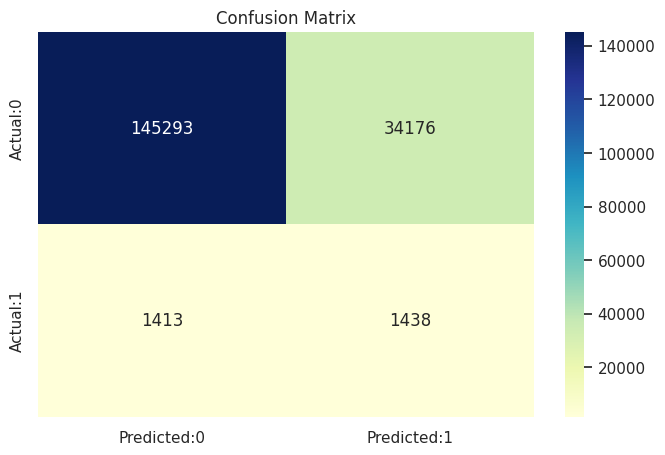

In [100]:
cm = confusion_matrix(y_test, y_pred)

conf_matrix = pd.DataFrame(data=cm, columns=['Predicted:0', 'Predicted:1'], index=['Actual:0', 'Actual:1'])



# Plotting Confusion Matrix

plt.figure(figsize=(8, 5))

sns.heatmap(conf_matrix, annot=True, fmt='d', cmap="YlGnBu")

plt.title("Confusion Matrix")

plt.show()

Precision-Recall AUC: 0.0395


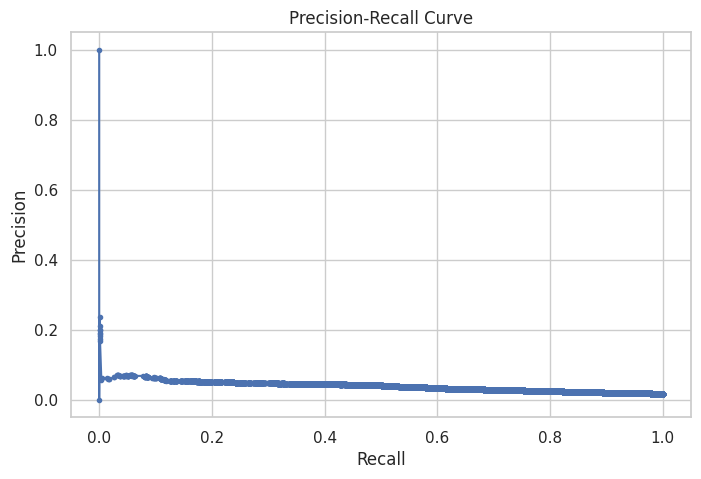

In [101]:
# Predicted probabilities for the positive class

y_scores = best_rf.predict_proba(X_test)[:, 1]



# Calculate Precision-Recall curve

precision, recall, _ = precision_recall_curve(y_test, y_scores)

pr_auc = auc(recall, precision)

print(f"Precision-Recall AUC: {pr_auc:.4f}")



# Plot Precision-Recall Curve

plt.figure(figsize=(8, 5))

plt.plot(recall, precision, marker='.')

plt.xlabel("Recall")

plt.ylabel("Precision")

plt.title("Precision-Recall Curve")

plt.show()

In [102]:
cv_score = cross_val_score(best_rf, X_train_resampled, y_train_resampled, cv=5, scoring='f1')

print("Cross-validation F1 Scores:", cv_score)

print("Average Cross-validation F1 Score: {:.4f}".format(cv_score.mean()))

Cross-validation F1 Scores: [0.79328407 0.80894584 0.8046074  0.80020582 0.81297819]
Average Cross-validation F1 Score: 0.8040


**8.3 XGBoost**

In [103]:
xgb_model = xgb.XGBClassifier(objective='binary:logistic', random_state=42, eval_metric="auc")

In [104]:
param_grid = {

    'n_estimators': [10, 20, 30, 50],

    'max_depth': [3, 5, 7],

    'learning_rate': [0.01, 0.1, 0.2],

    'scale_pos_weight': [1, 10, 20]

}

In [105]:
grid_search = GridSearchCV(estimator=xgb_model, param_grid=param_grid, scoring='roc_auc', cv=3, n_jobs=-1)

grid_search.fit(X_train_resampled, y_train_resampled)



# Get the best parameters

best_params = grid_search.best_params_

print("Best parameters found: ", best_params)

Best parameters found:  {'learning_rate': 0.2, 'max_depth': 7, 'n_estimators': 50, 'scale_pos_weight': 10}


In [106]:
# Train with the best parameters from grid search

xgb_best = xgb.XGBClassifier(**best_params, objective='binary:logistic', random_state=42, eval_metric="auc")

xgb_best.fit(X_train_resampled, y_train_resampled)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='auc', feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.2, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=7, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=50, n_jobs=None,
              num_parallel_tree=None, random_state=42, ...)

In [107]:
# Predictions

y_pred_xgb = xgb_best.predict(X_test)



# Classification Report

print("Classification Report:\n", classification_report(y_test, y_pred_xgb))

Classification Report:
               precision    recall  f1-score   support

           0       0.99      0.70      0.82    179469
           1       0.03      0.63      0.06      2851

    accuracy                           0.70    182320
   macro avg       0.51      0.67      0.44    182320
weighted avg       0.98      0.70      0.81    182320



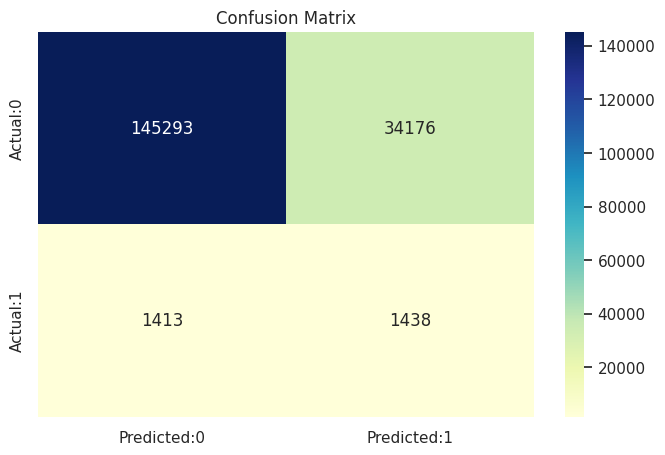

In [108]:
cm_xgb = confusion_matrix(y_test, y_pred)

conf_matrix_xgb = pd.DataFrame(data=cm_xgb, columns=['Predicted:0', 'Predicted:1'], index=['Actual:0', 'Actual:1'])



# Plotting Confusion Matrix

plt.figure(figsize=(8, 5))

sns.heatmap(conf_matrix_xgb, annot=True, fmt='d', cmap="YlGnBu")

plt.title("Confusion Matrix")

plt.show()

Precision-Recall AUC: 0.0421


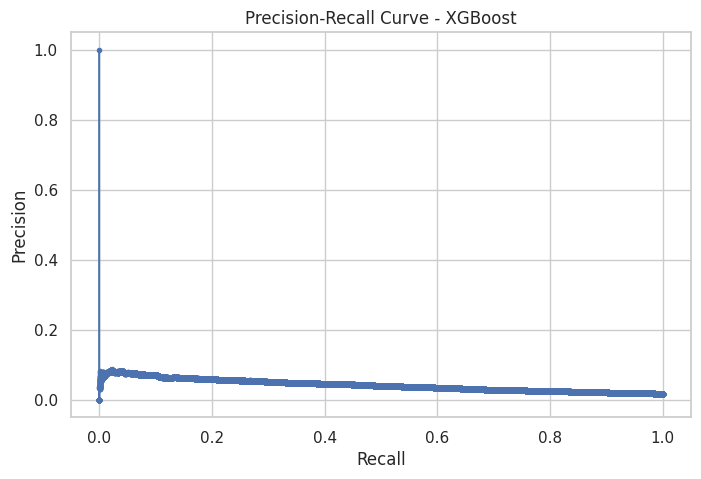

In [109]:
# Predicted probabilities for the positive class

y_pred_proba = xgb_best.predict_proba(X_test)[:, 1]



# Calculate Precision-Recall curve

precision, recall, _ = precision_recall_curve(y_test, y_pred_proba)

pr_auc = auc(recall, precision)

print(f"Precision-Recall AUC: {pr_auc:.4f}")



# Plot Precision-Recall Curve

plt.figure(figsize=(8, 5))

plt.plot(recall, precision, marker='.')

plt.xlabel("Recall")

plt.ylabel("Precision")

plt.title("Precision-Recall Curve - XGBoost")

plt.show()

In [110]:
cv_score = cross_val_score(xgb_best, X_train_resampled, y_train_resampled, cv=5, scoring='f1')

print("Cross-validation F1 Scores:", cv_score)

print("Average Cross-validation F1 Score: {:.4f}".format(cv_score.mean()))

Cross-validation F1 Scores: [0.85856941 0.86858928 0.87028265 0.86558165 0.85832038]
Average Cross-validation F1 Score: 0.8643


**8.4 LightBGM**